In [1]:
from PIL import Image
import os, glob

In [2]:
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    target_size = (28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")
        
    print(len(images), "images resized.")
    
image_dir_path = os.getenv("HOME") + "/aiffel/lms/data/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("scissors resize completed!")

100 images to be resized.
100 images resized.
scissors resize completed!


In [3]:
def resize_images_rock(img_path):
    images = glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    target_size = (28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")
        
    print(len(images), "images resized.")
    
image_dir_path = os.getenv("HOME") + "/aiffel/lms/data/rock_scissor_paper/rock"
resize_images_rock(image_dir_path)

print("rock resize completed!")

100 images to be resized.
100 images resized.
rock resize completed!


In [4]:
def resize_images_paper(img_path):
    images = glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    target_size = (28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")
        
    print(len(images), "images resized.")
    
image_dir_path = os.getenv("HOME") + "/aiffel/lms/data/rock_scissor_paper/paper"
resize_images_paper(image_dir_path)

print("paper resize completed!")

100 images to be resized.
100 images resized.
paper resize completed!


In [5]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/lms/data/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

_x_test = x_train_norm[int(len(x_train)*0.7):]
_y_test = y_train[int(len(x_train)*0.7):]
_x_train = x_train_norm[:int(len(x_train)*0.7)]
_y_train = y_train[:int(len(x_train)*0.7)]

print("_x_train shape: {}".format(_x_train.shape))
print("_y_train shape: {}".format(_y_train.shape))
print("_x_test shape: {}".format(_x_test.shape))
print("_y_test shape: {}".format(_y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)
_x_train shape: (210, 28, 28, 3)
_y_train shape: (210,)
_x_test shape: (90, 28, 28, 3)
_y_test shape: (90,)


label: 0


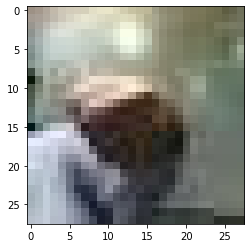

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[150])
print("label:", y_train[0])

In [7]:
x_train_reshaped = _x_train.reshape(-1,28,28,3)
x_test_reshaped = _x_test.reshape(-1,28,28,3)

print("x_train_reshaped shape: ", np.shape(x_train_reshaped))
print("x_test_reshaped shape: ", np.shape(x_test_reshaped))

x_train_reshaped shape:  (210, 28, 28, 3)
x_test_reshaped shape:  (90, 28, 28, 3)


label: 2


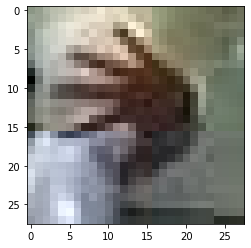

In [8]:
plt.imshow(_x_test[0])
print("label:", _y_test[0])

## Model 

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [10]:
n_channel_1 = 16
n_channel_2 = 32
n_dense = 32
n_train_epoch = 50

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, _y_train, epochs=n_train_epoch)

Epoch 1/50
7/7 [==============================] - 5s 283ms/step - loss: 1.0306 - accuracy: 0.3341
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.8614 - accuracy: 0.4292
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.8267 - accuracy: 0.5465
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7838 - accuracy: 0.6756
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7652 - accuracy: 0.6775
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7494 - accuracy: 0.7022
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.7319
Epoch 8/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.7917
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5126 - accuracy: 0.8669
Epoch 10/50
7/7 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.8771
Epoch 11/50
7/7 [====================

In [ ]:
np.shape(x_train_reshaped)
#np.shape(_y_train)
#print(np.min(_x_train))
#print(np.max(_x_train))

## Evaluation & Prediction

In [12]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, _y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

3/3 - 1s - loss: 0.8753 - accuracy: 0.7778
test_loss: 0.8753207921981812 
test_accuracy: 0.7777777910232544


In [13]:
np.shape(x_test_reshaped)

(90, 28, 28, 3)

In [14]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', _y_test[idx])

model.predict() 결과 :  [1.5851196e-04 7.7744000e-02 9.2209750e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  2


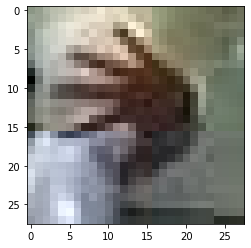

In [16]:
plt.imshow(_x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.00659472 0.77671915 0.21668613]
라벨: 2, 예측결과: 1


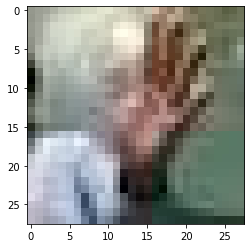

예측확률분포: [1.9103342e-04 8.2374376e-01 1.7606519e-01]
라벨: 2, 예측결과: 1


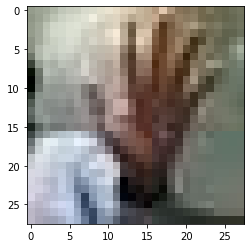

예측확률분포: [6.8894500e-04 9.6142071e-01 3.7890423e-02]
라벨: 2, 예측결과: 1


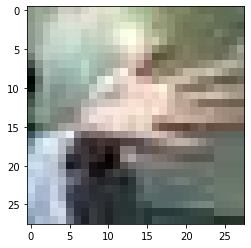

예측확률분포: [0.00352764 0.66573846 0.3307339 ]
라벨: 2, 예측결과: 1


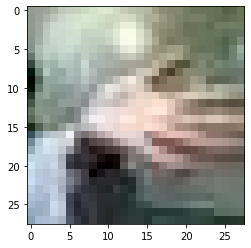

예측확률분포: [9.5812855e-03 9.8946536e-01 9.5338025e-04]
라벨: 2, 예측결과: 1


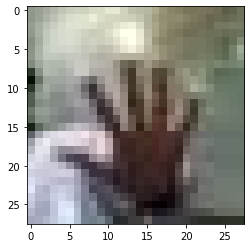

In [20]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != _y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(_y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(_x_test[n], cmap=plt.cm.binary)
    plt.show()